## Telecom Dataset for Customer Churn

### 1. Dataset Description  <a id='titanic'>

The dataset provided is from a telecom company which has a record of customer information and their churn.  <br>
Our goal is to predict the customers who might stop using their services.  <br>

**Column Description :** <br>
- Customer ID : Unique ID of customer
- gender : Two categories Male and Female
- Senior Citizen : Two categories 0 or 1
- Partner : Yes or No
- Dependents : Yes or No
- tenure : How long have they been with the company
- Phone Service : Yes or No
- Multiple Lines : Yes, No or No phone service
- Internet Service : DSL, Fiber Optics or No
- Online Security : Yes, No or No internet service 
- Online Backup : Yes, No or No internet service
- Device Protection : Yes, No or No internet service
- Tech Support : Yes, No or No internet service
- Streaming TV : Yes, No or No internet service
- Streaming Movies : Yes, No or No internet service
- Contract : Month-to-month, One year, Two year
- Paperless Biling : Yes or No
- Payment Method : Electronic check, Mailed check, Bank Transfer(automatic), Credit Card(automatic)
- Monthly Charges : Numeric value 
- Total Charges : Numeric value
- Churn : Yes or No



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Telco-Customer-Churn.xlsx']


### 2. Importing the packages and dataset  <a id='packages'>

In [2]:
telco_df = pd.read_excel("../input/Telco-Customer-Churn.xlsx")

In [3]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

### 3. Exploring the dataset  <a id='explore'>

In [ ]:
telco_df.head()

In [ ]:
telco_df.info()

There are 7043 rows and 21 columns. <br>
There are only 3 numeric features and the rest are all categorical. 


In [6]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values.

**Descriptive Statistics**

In [7]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There is a lot of difference in standard deviations. We would need to scale the features. But Tree models do not need feature scaling

In [8]:
corr = telco_df.corr()

In [9]:
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


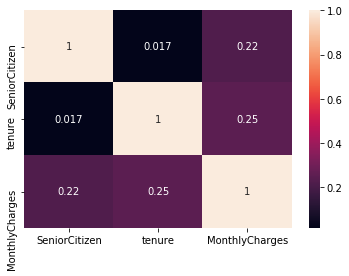

In [10]:
sns.heatmap(corr, annot=True)

There is absolutely no correlation between any 2 variables.

In [11]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Exploratory Data Analysis**

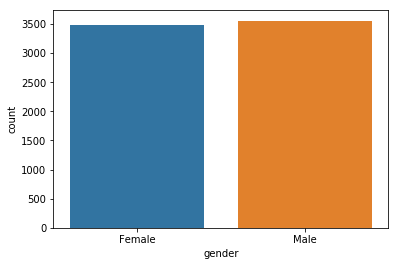

In [12]:
sns.countplot(x='gender', data=telco_df)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


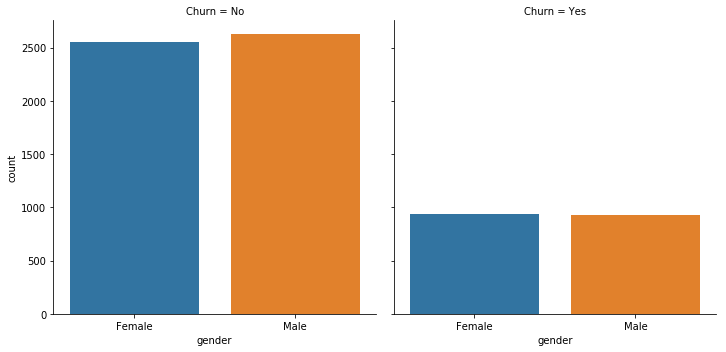

In [13]:
sns.factorplot(x='gender', col='Churn', kind='count', data=telco_df);

No relation between gender and churn. From the graph it is visible that both male and female are equally distributed. Therefore no impact of gender on churn. 

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


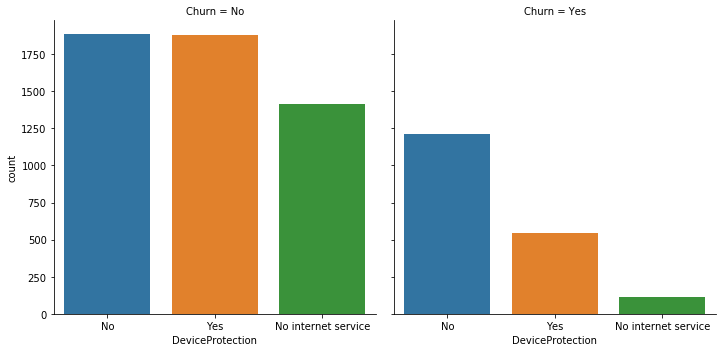

In [14]:
sns.factorplot(x='DeviceProtection', col='Churn', kind='count', data=telco_df);

When it comes to device protection, it doesn't give any insight about customer who are staying back. As for cutomer who are staying back, the device protection is not the only reasin for stay. <br>
But it do provide information (right side graph) about the customer who are leaving the telecom provider, so there device protections plays a role. Therefore device protection is important but not that important.<br>

From the no internet service, we can further look into the streaming movies. As we can say that having no internet service means no streaming movies.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


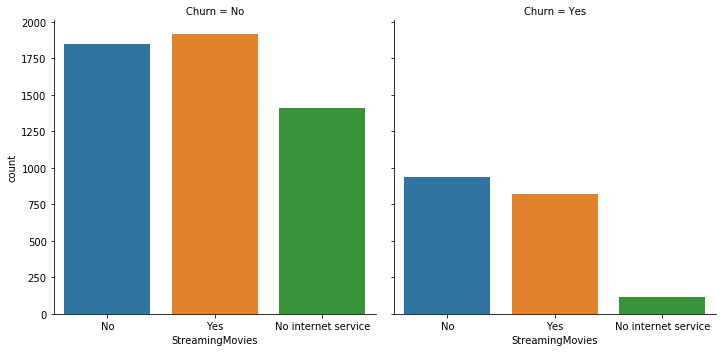

In [15]:
sns.factorplot(x='StreamingMovies', col='Churn', kind='count', data=telco_df);

From, the graph we can say that streaming movies and tv is not the deciding factor for the customer to decide whether to churn or not. 

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


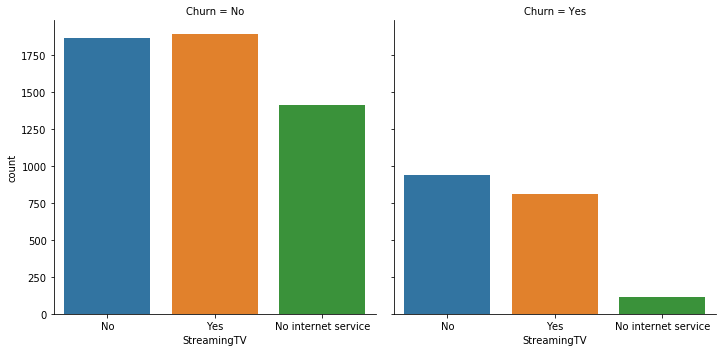

In [16]:
sns.factorplot(x='StreamingTV', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


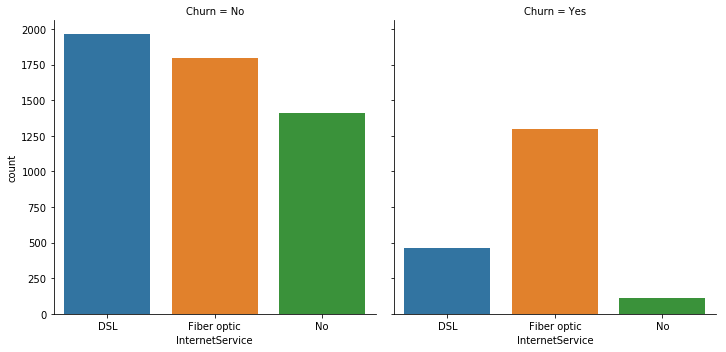

In [17]:
sns.factorplot(x='InternetService', col='Churn', kind='count', data=telco_df);

From the left side graph, customer who are staying for them fiber optics is not so important. But for those who are leaving (right side graph), customers especially companies, startups who needs higher bandwith. For them fiber optics internet service is important. Hence, more Fiber optic InternetService users are leaving. 

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


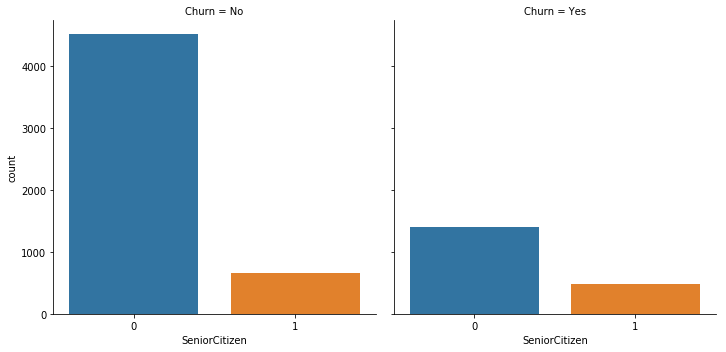

In [18]:
sns.factorplot(x='SeniorCitizen', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Customer tenure with Telecom Provider')

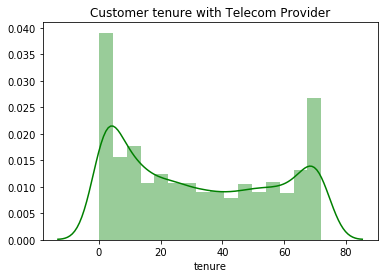

In [19]:
sns.distplot(telco_df['tenure'], color = 'green')
plt.title('Customer tenure with Telecom Provider')


Most of the datapoint are on the leftside. As there is not much differenc between mean and median. So the graph is pretty much flat at the centre. But due to high variance at min and max and high standard deviation. We noticed a right and left tail

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Monthly Charges')

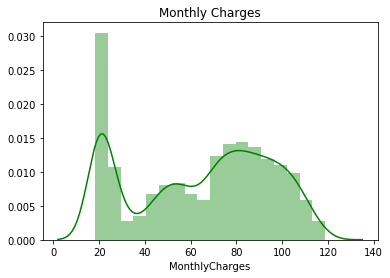

In [20]:

sns.distplot(telco_df['MonthlyCharges'], color = 'green')
plt.title('Monthly Charges')



/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


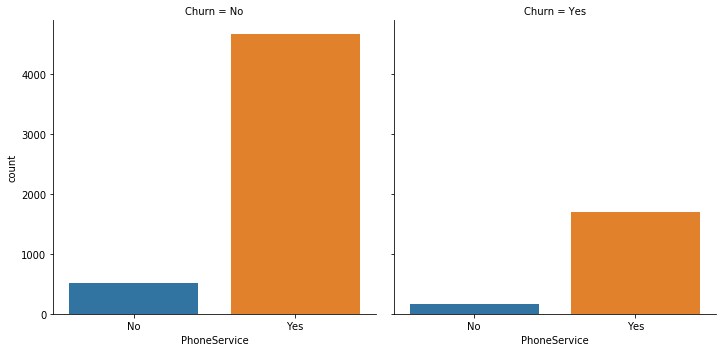

In [21]:
sns.factorplot(x='PhoneService', col='Churn', kind='count', data=telco_df);


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


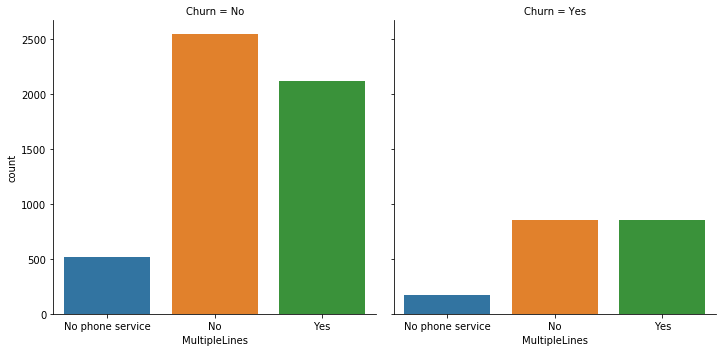

In [22]:
sns.factorplot(x='MultipleLines', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


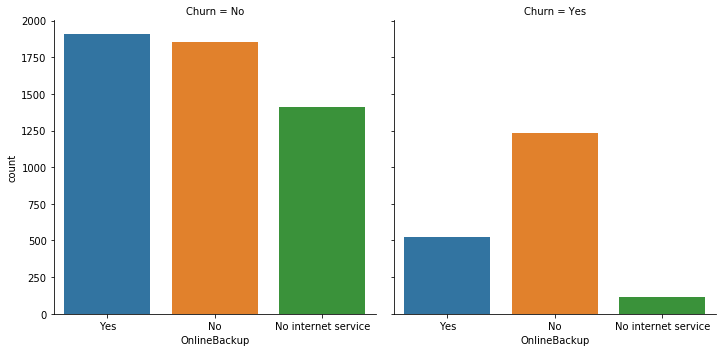

In [23]:
sns.factorplot(x='OnlineBackup', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


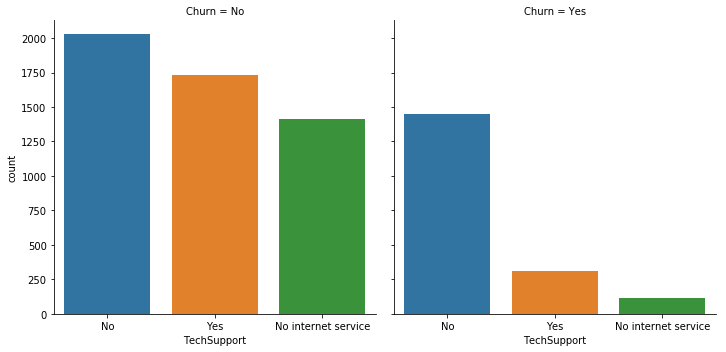

In [24]:
sns.factorplot(x='TechSupport', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


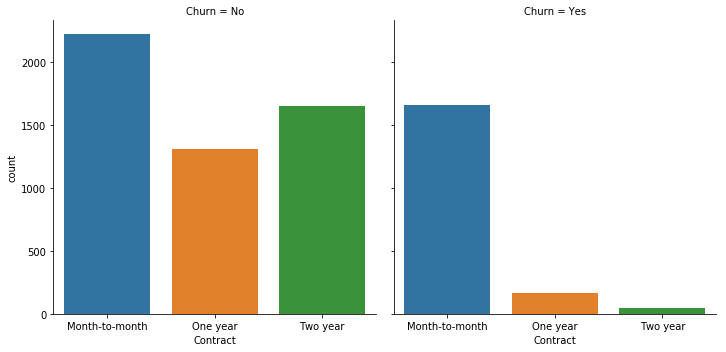

In [25]:
sns.factorplot(x='Contract', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


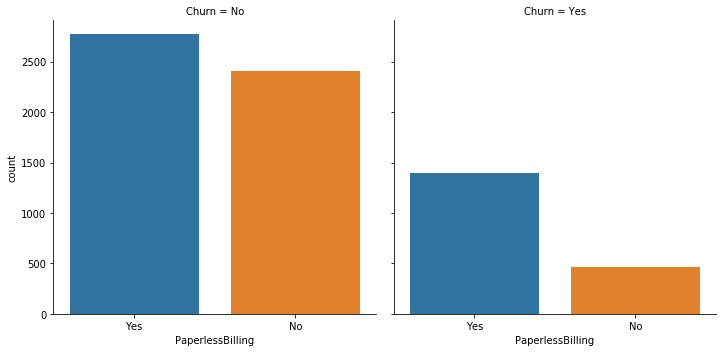

In [26]:
sns.factorplot(x='PaperlessBilling', col='Churn', kind='count', data=telco_df);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<function matplotlib.pyplot.show(*args, **kw)>

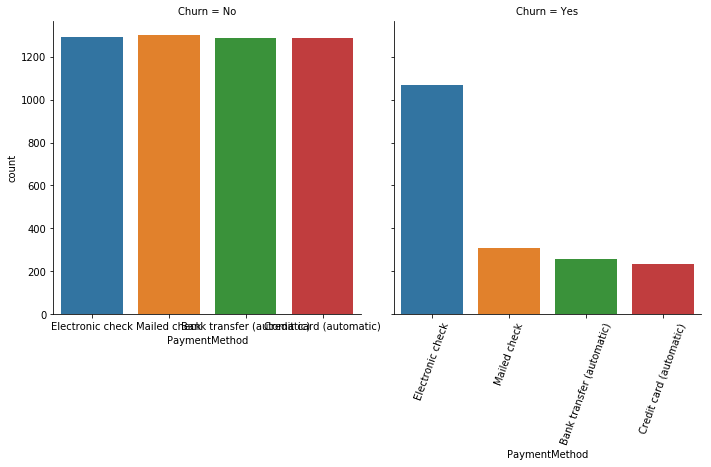

In [27]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.factorplot(x='PaymentMethod', col='Churn', kind='count', data=telco_df);
plt.xticks(rotation =70)

plt.show

### 4. Feature Engineering  <a id='fe'>

No     5174
Yes    1869
Name: Churn, dtype: int64

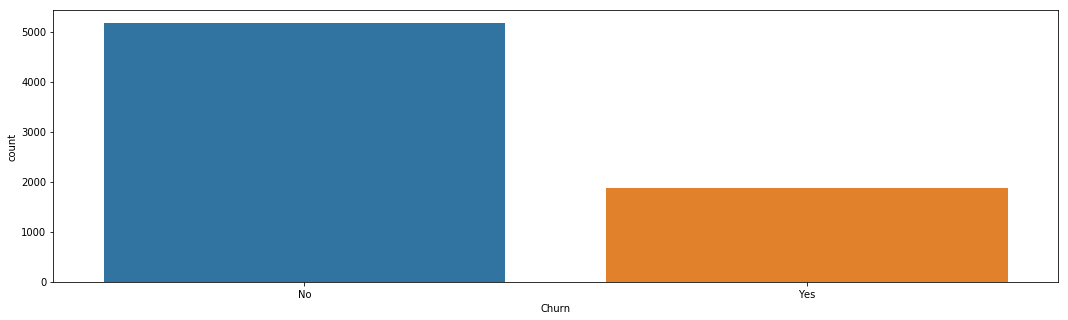

In [28]:
sns.countplot(x="Churn", data=telco_df)
telco_df.Churn.value_counts()

As we can see that the dataset is imbalanced. The number of customer churn is aproximately 1/4 of the dataset to the customer didnot churn is approximately 3/4 of the dataset. 

Lets separate the categorical and numeric columns.

In [29]:
cat_df = telco_df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
cat_df.shape

(7043, 16)

Dummification of categorical columns.

In [30]:
cat_cols = pd.get_dummies(cat_df, drop_first=True)
cat_cols.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [31]:
cat_cols.shape

(7043, 27)

In [32]:
num_df = telco_df.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis=1)
num_df.shape

(7043, 5)

In [33]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID        7043 non-null object
SeniorCitizen     7043 non-null int64
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


Merging dummified and categorical columns.

In [34]:
dataset = pd.concat([num_df,cat_cols], axis=1 )

In [35]:
dataset.shape

(7043, 32)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                 

In [37]:
dataset['TotalCharges']==' '

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7013    False
7014    False
7015    False
7016    False
7017    False
7018    False
7019    False
7020    False
7021    False
7022    False
7023    False
7024    False
7025    False
7026    False
7027    False
7028    False
7029    False
7030    False
7031    False
7032    False
7033    False
7034    False
7035    False
7036    False
7037    False
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

**Taking care of object dtype**

In [38]:
dataset['TotalCharges'][dataset['TotalCharges']==' ']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [39]:
dataset = dataset.drop(labels = list(dataset.TotalCharges[dataset.TotalCharges == " "].index))

In [40]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

## 5. Decision Tree  <a id='dt'>

In [41]:
y = dataset["Churn_Yes"].values

X = dataset.drop(['Churn_Yes','customerID'], axis=1)

In [42]:
# Stratified sampling

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101,stratify=y)

In [43]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=101, min_samples_leaf=3, class_weight="balanced")  #, class_weight="balanced"
my_tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

### 5.1 Training Decision Tree Model   <a id=tdt>

In [44]:
# Fit the decision tree model on your features and label

my_tree_one = my_tree_one.fit(X_train, y_train)

In [45]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(X_train.columns,my_tree_one.feature_importances_))

[('SeniorCitizen', 0.0),
 ('tenure', 0.0),
 ('MonthlyCharges', 0.0814628292870132),
 ('TotalCharges', 0.01866862457835374),
 ('gender_Male', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_Fiber optic', 0.12441593937320512),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No internet service', 0.0),
 ('StreamingTV_Yes', 0.0),
 ('StreamingMovies_No internet service', 0.0),
 ('StreamingMovies_Yes', 0.0),
 ('Contract_One year', 0.28030027287483444),
 ('Contract_Two year', 0.4830502656776943),
 ('PaperlessBilling_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0),
 ('P

We can see that 'Contract_Two year' is a important parameter in the model while predicting whether customer stay or churn away from the existing telecom provider.

In [46]:

# The accuracy of the model on Train data

print(my_tree_one.score(X_train, y_train))


# The accuracy of the model on Test data

print(my_tree_one.score(X_test, y_test))

0.6480577372107833
0.6656613528651444


We can see that the model is not over fitted because the accuracy score of train and test data are close to each other. Where as, the model is performing better with test data because it's accuracy score is better than the train data.  

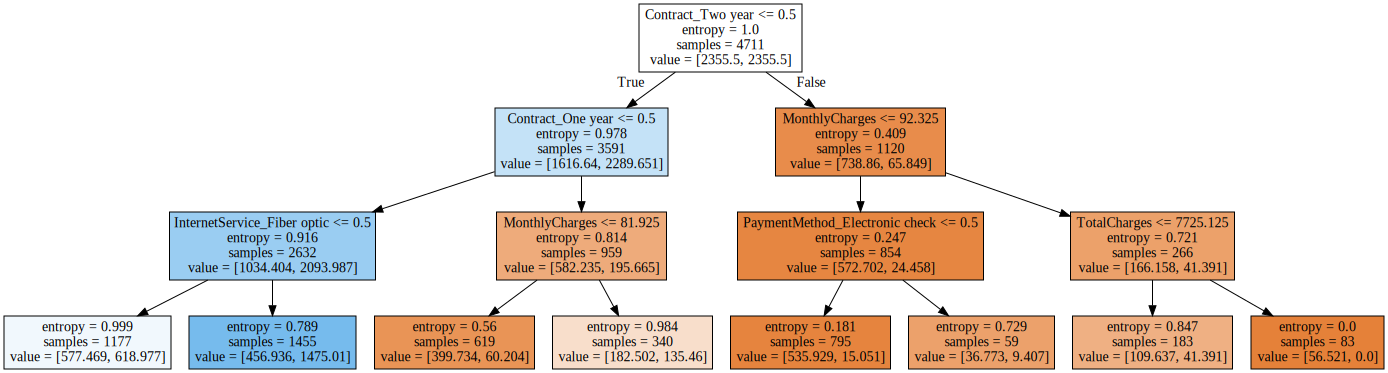

In [47]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=X_train.columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

### 5.2. Predictions of Decision Tree model   <a id= pdt>

In [48]:
y_pred = my_tree_one.predict(X_test)

### 5.3. Evaluation of Decision Tree  <a id=edt>

In [49]:
#Print Confusion matrix on Train Data
from sklearn.metrics import confusion_matrix, classification_report

pred = my_tree_one.predict(X_test)
df_confusion = confusion_matrix(y_test, pred)
df_confusion

array([[1003,  701],
       [  75,  542]])

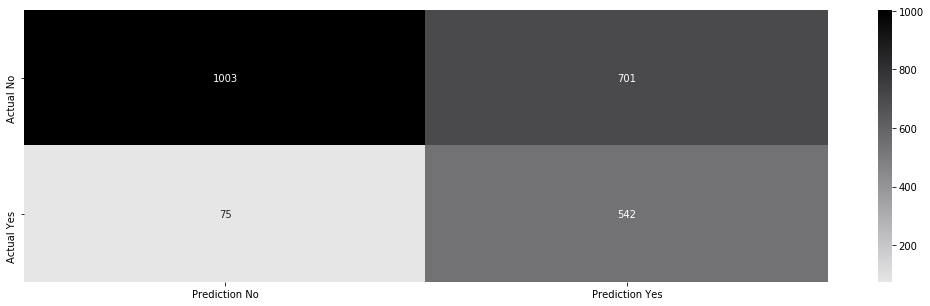

In [50]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [51]:
# Remove few features and train

### 5.4 Parameter Tuning   <a id='ptdt'>

#### What happen when we change the tree depth?

In [52]:
# Setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two

my_tree_two = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 101, class_weight='balanced')
my_tree_two = my_tree_two.fit(X_train, y_train)

#Print the score of both the decision tree

print("New Decision Tree Accuracy: ",my_tree_two.score(X_train, y_train))
print("Original Decision Tree Accuracy",my_tree_one.score(X_train,y_train))

New Decision Tree Accuracy:  0.8212693695606028
Original Decision Tree Accuracy 0.6480577372107833


We have improved our model by fine tuning the parameters. This is called hyperparameters tuning.

In [53]:
# Making predictions on our Test Data 

pred = my_tree_two.predict(X_test)

In [54]:
print("New Decision Tree Accuracy on test data: ",my_tree_two.score(X_test, y_test))

New Decision Tree Accuracy on test data:  0.7333046100818613


In [55]:
# The accuracy of the model on Train data

print(my_tree_two.score(X_train, y_train))


# The accuracy of the model on Test data

print(my_tree_two.score(X_test, y_test))

0.8212693695606028
0.7333046100818613


As we can see that the variation between the train and test data is significant. So, we can infer that our model is suffering from the overfitting. Though the accuracy score is better than the previous model ( my tree one; .665). It mainly because of the hyperparmater i.e. the increase in the max_depth, min_sample split due to which it become too much attached to training data and increases the level of complexity. Instead of being generic model it become more centric to specific conditions as we increases the number of levels. <br>

For example it is similar to survey where keeping the question minimum and generic can be utilise in other area of studies. Whereas, increasing the number of question will increase the level of complexity and direct the questions to specifice requirement. Therefore it will no longer remain a generic and become more specific to particular conditions.

In [56]:
# Building confusion matrix of our improved model

df_confusion_new = confusion_matrix(y_test, pred)
df_confusion_new

array([[1246,  458],
       [ 161,  456]])

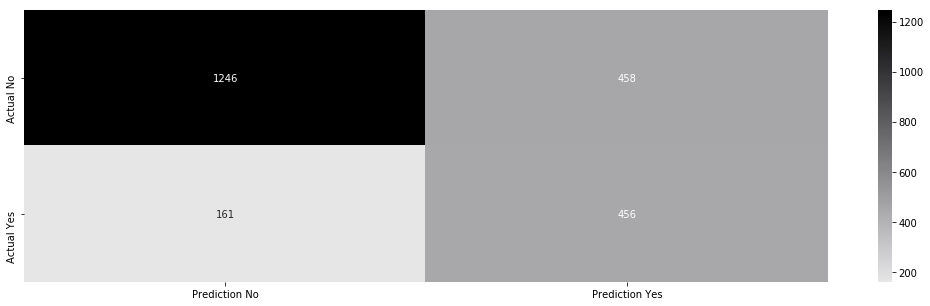

In [57]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_new, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

If we look back at our previous model (my tree one, TP =542) it is more accurate than the above model (my tree two, TP =457) to predict the customer churning. Therefore the recall and F1 score dropped in this model. 

## 6. Random Forest   <a id=rf>

In [58]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, max_depth = 10,random_state = 101, class_weight="balanced")

### 6.1. Training Random Forest Model  <a id=trf>

In [59]:
# Fitting the model on Train Data

my_forest = forest.fit(X_train, y_train)

In [60]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(X_train, y_train))

print(my_forest.score(X_test, y_test))


0.8643600084907663
0.7785437311503662


As we can see the model is suffering from overfitting. The main reason for this is having a 10 level of max depth, which seems to be huge and result in having a complex decision tree. We can reduce the overfitting by reducing the maxdepth.

### 6.2. Prediction from Random Forest Model   <a id=prf>

In [61]:
# Making predictions

pred = my_forest.predict(X_test)

In [62]:
list(zip(X_train.columns,my_forest.feature_importances_))

[('SeniorCitizen', 0.012829865834181753),
 ('tenure', 0.17914653208806716),
 ('MonthlyCharges', 0.11153119432339997),
 ('TotalCharges', 0.1594678166843687),
 ('gender_Male', 0.015274451343721691),
 ('Partner_Yes', 0.014393022486429412),
 ('Dependents_Yes', 0.014423843828840386),
 ('PhoneService_Yes', 0.004981501862278838),
 ('MultipleLines_No phone service', 0.004442885105699701),
 ('MultipleLines_Yes', 0.013023318241122479),
 ('InternetService_Fiber optic', 0.06326311598292479),
 ('InternetService_No', 0.012462696575068169),
 ('OnlineSecurity_No internet service', 0.007612841824523231),
 ('OnlineSecurity_Yes', 0.02537725060429006),
 ('OnlineBackup_No internet service', 0.008293871867859926),
 ('OnlineBackup_Yes', 0.018710960305272355),
 ('DeviceProtection_No internet service', 0.016411095066306253),
 ('DeviceProtection_Yes', 0.011249890956788734),
 ('TechSupport_No internet service', 0.013968654023295128),
 ('TechSupport_Yes', 0.0335347857012708),
 ('StreamingTV_No internet service', 

### 6.3 Evaluation of Random Forest Model  <a id=erf>

In [63]:
df_confusion_rf = confusion_matrix(y_test, pred)
df_confusion_rf

array([[1378,  326],
       [ 188,  429]])

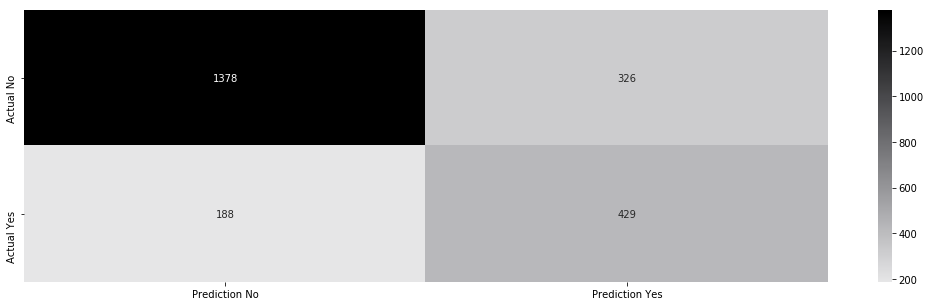

In [64]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### 7. Appendix  <a id = 'appendix'>

**Grid Search**

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.  <br>
Let's apply Grid Search on a Decision Tree Model. It has many parameters like tree depth, criterion... etc. We will build different models with different combinations of these parameters and come up with the best model. 


In [65]:
# Different parameters we want to test

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']
min_samples_split = [5,10,15]

In [66]:
# Importing GridSearch

from sklearn.model_selection import GridSearchCV

In [67]:
# Building the model

my_tree_three = tree.DecisionTreeClassifier(class_weight="balanced")

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion, min_samples_split=min_samples_split), verbose=2)

In [68]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_depth=5, min_samples_split=5 ................
[CV] . criterion=gini, max_depth=5, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=5 ................
[CV] . criterion=gini, max_depth=5, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=5 ................
[CV] . criterion=gini, max_depth=5, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=15 ...............
[CV]  criterion=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=5 ...............
[CV]  criterion=gini, max_depth=10, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=15 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=15 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=15 ..............
[

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy'], 'min_samples_split': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [69]:
# Best accuracy score

print('Avg accuracy score across 54 models:', grid.best_score_)

Avg accuracy score across 54 models: 0.7253237104648694


In [70]:
# Best parameters for the model

grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 15}

In [71]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 10, random_state=42, class_weight="balanced")

In [72]:
my_tree_three.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [73]:
# Accuracy Score for new model

my_tree_three.score(X_train,y_train)

0.8246656760772659

**Observation:** Our accuracy score improve from 0.73 to 0.82

**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [74]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [75]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [77]:
forest_two = RandomForestClassifier(class_weight="balanced")

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [78]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.3s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.5s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.4s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.5s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.5s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   4.0s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733,

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.3s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.2s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.3s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.4s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, mi

[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   3.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   3.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   3.7s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.5s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.5s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.6s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   3.1s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_sampl

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.8s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   5.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   5.0s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=377

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.8s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.8s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 15.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

A Random Forest model built with this hyperparameters will provide best accuracy

In [83]:
rf_random.best_score_

0.7966461473147951

**Observation:** The original Random forest algorithm gave 0.87 accuracy whereas after Randomized Grid Search we have only got 0.79. This is the best random combination of parameters the algorithm has choosen which produced the highest accuracy.

### The End